In [45]:
import json
with open('articles2019_n1.json','r',encoding ='utf8') as f:
    ar = json.load(f)
len(ar)

1998

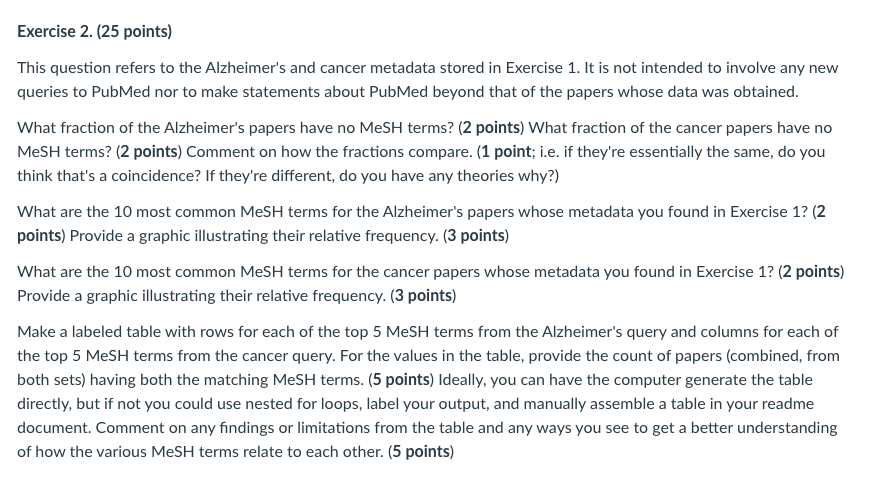

In [40]:
count1, count2 = 0, 0
for a in ar:
    
    if not ar[a]['mesh']:
        if ar[a]['query'] == 'Alzheimer' or ar[a]['query'] == 'Alzheimer&Cancer':
            
            count1+=1
        elif ar[a]['query'] == 'Cancer' or ar[a]['query'] == 'Alzheimer&Cancer':
            
            count2+=1
count1/1000, count2/1000

(0.152, 0.695)

In [46]:
mesh_dict = {}
for art in ar:
    if ar[art]['query'] =='Alzheimer' or ar[art]['query'] =='Alzheimer&Cancer':
        meshes = ar[art]['mesh']
        if meshes:
            for mesh in meshes:
                mesh_dict[mesh] = mesh_dict.get(mesh, 0) + 1

top10 = sorted(mesh_dict.items(), key = lambda x: x[1], reverse=True)[:10]
top10

[('Alzheimer Disease', 704),
 ('Humans', 701),
 ('Male', 361),
 ('Female', 308),
 ('Aged', 292),
 ('Animals', 285),
 ('Amyloid beta-Peptides', 213),
 ('Brain', 193),
 ('Aged, 80 and over', 173),
 ('Cognitive Dysfunction', 163)]

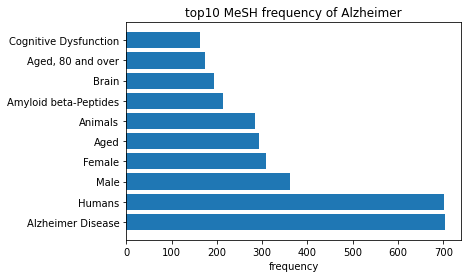

In [47]:
import matplotlib.pyplot as plt

mesh10, frequency = zip(*top10)
plt.barh(mesh10, frequency)
plt.title('top10 MeSH frequency of Alzheimer')
plt.xlabel('frequency')
plt.show()

In [11]:
mesh_dict1 = {}
for art in ar:
    if ar[art]['query'] =='Cancer' or ar[art]['query'] =='Alzheimer&Cancer':
        meshes = ar[art]['mesh']
        if meshes:
            for mesh in meshes:
                mesh_dict1[mesh] = mesh_dict1.get(mesh, 0) + 1

top10_ = sorted(mesh_dict1.items(), key = lambda x: x[1], reverse=True)[:10]
top10_

[('Humans', 282),
 ('Female', 128),
 ('Middle Aged', 89),
 ('Male', 85),
 ('Adult', 73),
 ('Aged', 67),
 ('Retrospective Studies', 41),
 ('Animals', 39),
 ('Neoplasms', 31),
 ('Treatment Outcome', 29)]

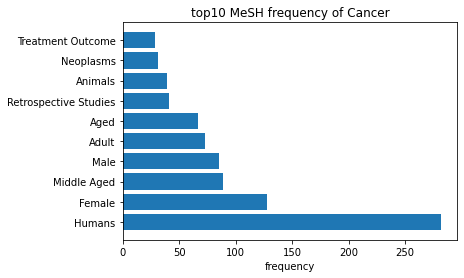

In [13]:
mesh10_, frequency_ = zip(*top10_)
plt.barh(mesh10_, frequency_)
plt.title('top10 MeSH frequency of Cancer')
plt.xlabel('frequency')
plt.show()

In [48]:
l1 = ['Alzheimer Disease',
  'Humans',
 'Male',
 'Female',
 'Aged']
 
l2=['Humans',
 'Female',
 'Middle Aged',
 'Male',
 'Adult']

count={}
for i in l1:
    for j in l2:
        for art in ar:
            if i in ar[art]['mesh'] and j in ar[art]['mesh']:
                count[i+','+j] = count.get(i+','+j, 0)+1
                
    

In [49]:
count

{'Alzheimer Disease,Humans': 581,
 'Alzheimer Disease,Female': 244,
 'Alzheimer Disease,Middle Aged': 110,
 'Alzheimer Disease,Male': 290,
 'Alzheimer Disease,Adult': 26,
 'Humans,Humans': 982,
 'Humans,Female': 421,
 'Humans,Middle Aged': 236,
 'Humans,Male': 398,
 'Humans,Adult': 112,
 'Male,Humans': 398,
 'Male,Female': 353,
 'Male,Middle Aged': 202,
 'Male,Male': 445,
 'Male,Adult': 82,
 'Female,Humans': 421,
 'Female,Female': 435,
 'Female,Middle Aged': 217,
 'Female,Male': 353,
 'Female,Adult': 99,
 'Aged,Humans': 358,
 'Aged,Female': 314,
 'Aged,Middle Aged': 191,
 'Aged,Male': 305,
 'Aged,Adult': 67}

In [43]:
import pandas as pd
import numpy as np
table = pd.DataFrame(data = np.array(np.random.randint(1,2,25)).reshape(5,5),columns = l1)
table.index=l2

for i in count:
    idx = i.split(',')
    table[idx[0]][idx[1]] = count[i]

In [44]:
table

,Alzheimer Disease,Humans,Male,Female,Aged
Humans,581,982,398,421,358
Female,244,421,353,435,314
Middle Aged,110,236,202,217,191
Male,290,398,445,353,305
Adult,26,112,82,99,67
